In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime 

In [3]:
# читаем данные исходной таблицы
data = pd.read_excel('data.xlsx')
data.head()

,year,month,traffic_source,detail_traffic,visits_in_history,gender,age,visits,users,rejections
0,2020,январь,Переходы по рекламе,Яндекс: Директ,1,мужской,55 лет и старше,491,491,0.219959
1,2020,январь,Переходы по рекламе,Google Ads,1,женский,55 лет и старше,310,310,0.803226
2,2020,январь,Переходы по рекламе,Яндекс: Директ,1,мужской,45-54 года,281,281,0.220641
3,2020,январь,Переходы по рекламе,Яндекс: Директ,1,мужской,55 лет и старше,265,265,0.354717
4,2020,январь,Переходы по рекламе,Яндекс: Директ,1,мужской,35‑44 года,248,248,0.358871


In [4]:
monthes = {'январь': '01', 'февраль': '02', 'март': '03', 'апрель': '04', 'май': '05', 'июнь': '06', 'июль': '07', 
         'август': '08', 'сентябрь': '09', 'октябрь': '10', 'ноябрь': '11', 'декабрь': '12'}

In [5]:
def month(date): #поскольку в таблице есть колонки с названием месяца, которые нам понадобятся, переводим в формат datetime
    for month, v in monthes.items():
        if date == month:
            return v

data['month'] = data['month'].apply(month)
data

,year,month,traffic_source,detail_traffic,visits_in_history,gender,age,visits,users,rejections
0,2020,01,Переходы по рекламе,Яндекс: Директ,1,мужской,55 лет и старше,491,491,0.219959
1,2020,01,Переходы по рекламе,Google Ads,1,женский,55 лет и старше,310,310,0.803226
2,2020,01,Переходы по рекламе,Яндекс: Директ,1,мужской,45-54 года,281,281,0.220641
3,2020,01,Переходы по рекламе,Яндекс: Директ,1,мужской,55 лет и старше,265,265,0.354717
4,2020,01,Переходы по рекламе,Яндекс: Директ,1,мужской,35‑44 года,248,248,0.358871
...,...,...,...,...,...,...,...,...,...,...
28221,2020,10,Переходы из рекомендательных систем,Яндекс Дзен,1,Не определено,младше 18 лет,1,1,0.000000
28222,2020,10,Переходы из рекомендательных систем,Яндекс Дзен,1,мужской,25‑34 года,1,1,0.000000
28223,2020,10,Переходы из рекомендательных систем,Яндекс Дзен,1,мужской,35‑44 года,1,1,0.000000
28224,2020,10,Переходы из рекомендательных систем,Яндекс Дзен,1,мужской,35‑44 года,1,1,0.000000


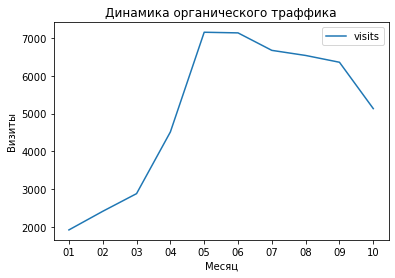

In [6]:
# График: Как изменяется органический трафик по месяцам года
# после перевода данных почему-то перестал отображаться граффик.

data_filter = data[['month', 'traffic_source', 'visits']]
dynamics_by_month = data_filter[(data_filter['traffic_source'] == 'Переходы из поисковых систем')].groupby('month').sum().sort_values('month')
plt.plot(dynamics_by_month.index, dynamics_by_month.visits)
plt.title('Динамика органического траффика')
plt.xlabel('Месяц')
plt.ylabel('Визиты')
plt.legend(dynamics_by_month)


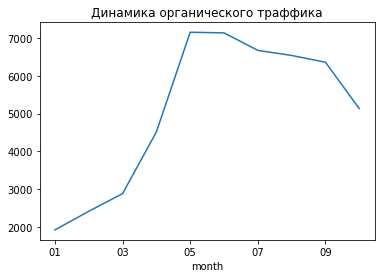

In [7]:
dynamics_by_month['visits'].plot(title='Динамика органического траффика', 
                                        x='Месяц', 
                                        y='Визиты')

In [ ]:
# Ввод:
# Диаграмма позволяет понять, как происходит изменение органического трафика по месяцам. Так мы выявляем сезонность продукта.

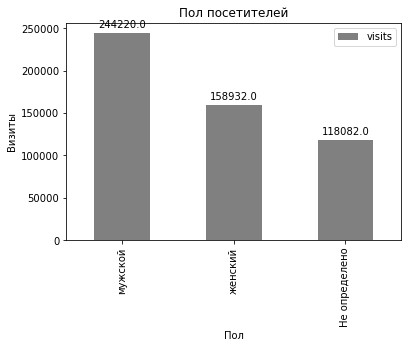

In [52]:
#Столбчатая диарамма - посетители в размрезе пола и возраста
# строим диаграмму по полу посетителей сайта.
gender = data[['gender', 'age', 'visits']].groupby(by='gender').sum().sort_values(by='visits', ascending=False).head()
gender.head()# готовим данные таблицы
bar = gender.plot(kind='bar', color = 'grey') # строим диаграмму
plt.title('Пол посетителей') # делаем подписи
plt.xlabel('Пол')
plt.ylabel('Визиты') 
plt.legend(gender)
for p in bar.patches:# подписываем столбцы
    bar.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

In [ ]:
# Вывод:
# смотрим пол посетителей сайта для анализа ЦА

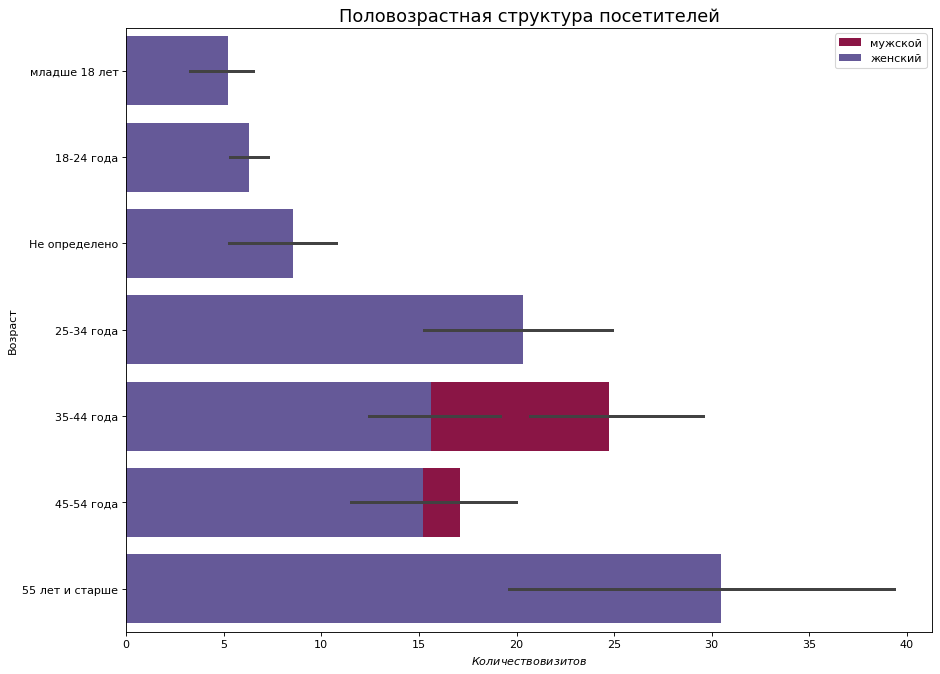

In [69]:
# Пирамида: половозрастная структура посетителей сайта:
# почему-то пирамида не получилась, данные по мужской аудитории не совпадают с таблицей
data = pd.read_excel('data.xlsx')
gender = data[['gender', 'age', 'visits']]
gender_ = gender[ (gender['gender']=='женский') | (gender['gender']=='мужской') ]

# делаем пирамиду
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'gender'
order_of_bars = gender_.age.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(gender_[group_col].unique())-1)) for i in range(len(gender_[group_col].unique()))]

for c, group in zip(colors, gender_[group_col].unique()):
    sns.barplot(x='visits', y='age', data=gender_.loc[gender_[group_col]==group, :], order=order_of_bars, color=c, label=group)

# украшения    
plt.xlabel("$Количество визитов$")
plt.ylabel("Возраст")
plt.yticks(fontsize=10)
plt.title("Половозрастная структура посетителей", fontsize=16)
plt.legend()
plt.show()

In [ ]:
#Вывод:
# на графике мы можем увидеть структуру посетителей сайта по полу и возрасту.
# Эти данные помогут нам выстравивать таргетирование на рекламных площадках.
# можно пойти дальше и посмотреть, на половозрастную структуру людей, которые чаще всего совершают конверсионные действия на сайте.

In [14]:
data = pd.read_excel('data.xlsx')# читаем данные первой таблицы и строим диаграмму

monthes = {'январь': '01', 'февраль': '02', 'март': '03', 'апрель': '04', 'май': '05', 'июнь': '06', 'июль': '07', 
         'август': '08', 'сентябрь': '09', 'октябрь': '10', 'ноябрь': '11', 'декабрь': '12'}

In [15]:
def month(date): #поскольку в таблице есть колонки с названием месяца, которые нам понадобятся, переводим в формат datetime
    for month, v in monthes.items():
        if date == month:
            return v

data['month'] = data['month'].apply(month)
data

,year,month,traffic_source,detail_traffic,visits_in_history,gender,age,visits,users,rejections
0,2020,01,Переходы по рекламе,Яндекс: Директ,1,мужской,55 лет и старше,491,491,0.219959
1,2020,01,Переходы по рекламе,Google Ads,1,женский,55 лет и старше,310,310,0.803226
2,2020,01,Переходы по рекламе,Яндекс: Директ,1,мужской,45-54 года,281,281,0.220641
3,2020,01,Переходы по рекламе,Яндекс: Директ,1,мужской,55 лет и старше,265,265,0.354717
4,2020,01,Переходы по рекламе,Яндекс: Директ,1,мужской,35‑44 года,248,248,0.358871
...,...,...,...,...,...,...,...,...,...,...
28221,2020,10,Переходы из рекомендательных систем,Яндекс Дзен,1,Не определено,младше 18 лет,1,1,0.000000
28222,2020,10,Переходы из рекомендательных систем,Яндекс Дзен,1,мужской,25‑34 года,1,1,0.000000
28223,2020,10,Переходы из рекомендательных систем,Яндекс Дзен,1,мужской,35‑44 года,1,1,0.000000
28224,2020,10,Переходы из рекомендательных систем,Яндекс Дзен,1,мужской,35‑44 года,1,1,0.000000


Text(0, 0.5, 'Запросы')

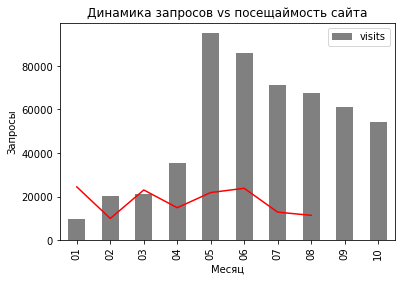

In [16]:
#Наложение 2х таблиц: отношение роста запросов с посещаймостью сайта

x = data[['year', 'month', 'visits']].groupby(['year', 'month']).sum().reset_index()
x_ = x[['month', 'visits']].set_index('month')
x_.plot(kind='bar', color = 'grey')
plt.title('Динамика запросов vs посещаймость сайта')
plt.xlabel('Месяц')
plt.ylabel('Визиты')

requests = pd.read_excel('wordstat.xlsx')# читаем данные второй таблицы и строим график
y = requests[(requests['year']==2020)].groupby(['year', 'month']).sum().reset_index()
y_ = y.filter(items = ['month', 'requests']).set_index('month')
plt.plot(y_.index, y_.requests, color = 'red')
plt.xlabel('Месяц')
plt.ylabel('Запросы')

In [ ]:
# Вывод:
# Визуализация позволяет понять, как соотносятся данные по посещаймости сайтов и поисковыми запросами нашей динамики.
# Мы видим, что взаимосвязь не срослеживается, что может говорить, о плохой эффективности рекламной кампании.
# Здесь можно пойти дальше и пронализировать связь поисковых запросов с трафиком из поисковиков и отдельно поисковые запросы и контектсный траффик.